<a href="https://colab.research.google.com/github/whsh99/algorithm/blob/main/dynamic_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Write code to measure the execution time of F(10), F(20), ..., F(100) using both pure recursive and dynamic programming methods. Plot the results as a line chart.

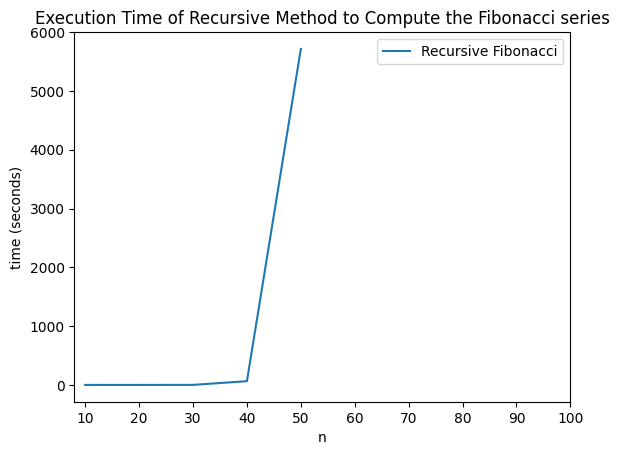

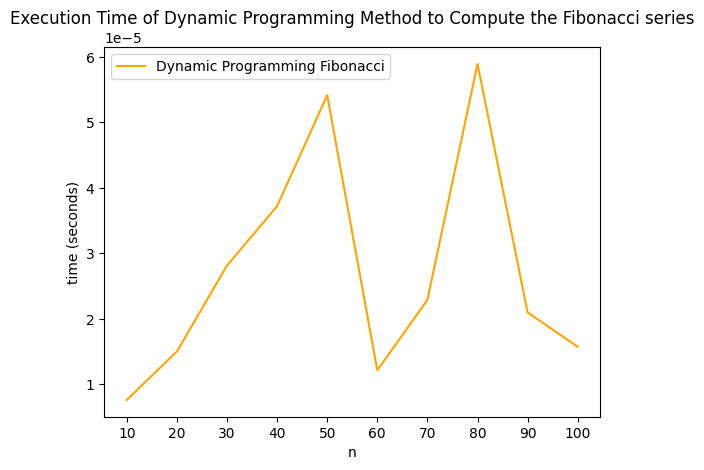

In [1]:
import time
import matplotlib.pyplot as plt

# Compute the Fibonacci series using the recursive method
def fib_r(n):
  if n == 0:
    return 0
  elif n == 1:
    return 1
  else:
    return fib_r(n-1) + fib_r(n-2)

# Compute the Fibonacci series using the dynamic programming method
def fib_dp(n):
  table = [0, 1]
  for i in range(2, n+1):
    table.append(table[i-1] + table[i-2])
  return table[n]

# Run experiments to measure the execution time of the recursive and dynamic programming methods
def run_experiment(n):
  times = {"recursive": 0, "dynamic_programming": 0}

  """
  Measure the execution time of the recursive method
  If n is greater than or equal to 50,
  the execution time of the recursive method is set to infinity
  """
  if n <= 50:
    start = time.time()
    fib_r(n)
    end = time.time()
    times["recursive"] = end - start
  else:
    times["recursive"] = float("inf")
  
  # Measure the execution time of the dynamic programming method
  start = time.time()
  fib_dp(n)
  end = time.time()
  times["dynamic_programming"] = end - start
  return times

# Run experiments and save results
results = []
for n in range(10, 101, 10):
  result = run_experiment(n)
  results.append(result)

# line chart of the execution time of the recursive method
x_values = range(10, 101, 10)
plt.plot(x_values, [r["recursive"] for r in results], label='Recursive Fibonacci')
plt.xticks(x_values)
plt.xlabel('n')
plt.ylabel('time (seconds)')
plt.legend()
plt.title("Execution Time of Recursive Method to Compute the Fibonacci series")
plt.show()
print()
# line chart of the execution time of the dynamic programming method
plt.plot(x_values, [r["dynamic_programming"] for r in results], label='Dynamic Programming Fibonacci', color="orange")
plt.xticks(x_values)
plt.xlabel('n')
plt.ylabel('time (seconds)')
plt.legend()
plt.title("Execution Time of Dynamic Programming Method to Compute the Fibonacci series")
plt.show()

2. Write code to determine the maximum value of n such that computing F(n+1) recursively causes your computer to crash. Then, using dynamic programming to compute F(n+1), determine whether your computer will still crash or not.

> Answer:
> 由於 n 大於50後，執行時間十分冗長(當 n 為50在 Colab 耗時約1.5個小時，在搭載 Intel® Core™ i5-6200U 筆記型電腦的 Jupyter Notebook 則耗時約1個小時)，
> 故印出 n 為51至100範圍的執行結果，來表示該範圍中，若發生任意 n 造成程式崩潰時，
> 使用動態規劃（dynamic programming）的方法並計算「n+1」的結果，除了可以讓執行時間大幅降低，也能順利得到結果。

In [2]:
#Use dynamic programming to calculate all results when n is greater than 50
start = 50
end = 100
step = 10
i = 0

print("Crash Simulation")
for n in range(start, end + 1, step):
  i = n + 1
  num = fib_dp(i)
  print("F({}): Crash, F({}): {}".format(n ,i, num))

Crash Simulation
F(50): Crash, F(51): 20365011074
F(60): Crash, F(61): 2504730781961
F(70): Crash, F(71): 308061521170129
F(80): Crash, F(81): 37889062373143906
F(90): Crash, F(91): 4660046610375530309
F(100): Crash, F(101): 573147844013817084101
